#  Universidad Nacional Abierta y a Distancia
    Vicerrectoría Académica y de Investigación
      Curso: Análisis de datos
       Código: 202016908_6 
       
 Tarea 5: Proyecto Análisis de Datos
 
            Estudiante:
    Rodolfo Enrique Oviedo Perez
    
        Grupo: 202337121_8
        
           Presentado a:
     Ing. Ferley Medina Rojas

# cargar Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
# Cargar el dataset
file_path = './Titanic-Dataset.csv'
titanic_df = pd.read_csv(file_path)

# Análisis exploratorio de los datos

In [3]:
# Mostrar información general del dataset
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   ID/pasajero                                      891 non-null    int64  
 1   Sobreviviente                                    891 non-null    int64  
 2   Clase/billete                                    891 non-null    int64  
 3   Nombre/Pasajero                                  891 non-null    object 
 4   Sexo                                             891 non-null    object 
 5   Edad                                             714 non-null    float64
 6   Número de hermanos/cónyuges a bordo del Titanic  891 non-null    int64  
 7   Número de padres/hijos a bordo del Titanic       891 non-null    int64  
 8   Ticket                                           891 non-null    object 
 9   Tarifa/pasajero                 

In [4]:
# Describir el dataset
print(titanic_df.describe())

       ID/pasajero  Sobreviviente  Clase/billete        Edad  \
count   891.000000     891.000000     891.000000  714.000000   
mean    446.000000       0.383838       2.308642   29.699118   
std     257.353842       0.486592       0.836071   14.526497   
min       1.000000       0.000000       1.000000    0.420000   
25%     223.500000       0.000000       2.000000   20.125000   
50%     446.000000       0.000000       3.000000   28.000000   
75%     668.500000       1.000000       3.000000   38.000000   
max     891.000000       1.000000       3.000000   80.000000   

       Número de hermanos/cónyuges a bordo del Titanic  \
count                                       891.000000   
mean                                          0.523008   
std                                           1.102743   
min                                           0.000000   
25%                                           0.000000   
50%                                           0.000000   
75%              

In [5]:
# Mostrar distribución de las variables categóricas
for column in ['Sexo', 'Embarcado', 'Clase/billete']:
    print(titanic_df[column].value_counts())

Sexo
male      577
female    314
Name: count, dtype: int64
Embarcado
S    644
C    168
Q     77
Name: count, dtype: int64
Clase/billete
3    491
1    216
2    184
Name: count, dtype: int64


<Figure size 1500x1000 with 0 Axes>

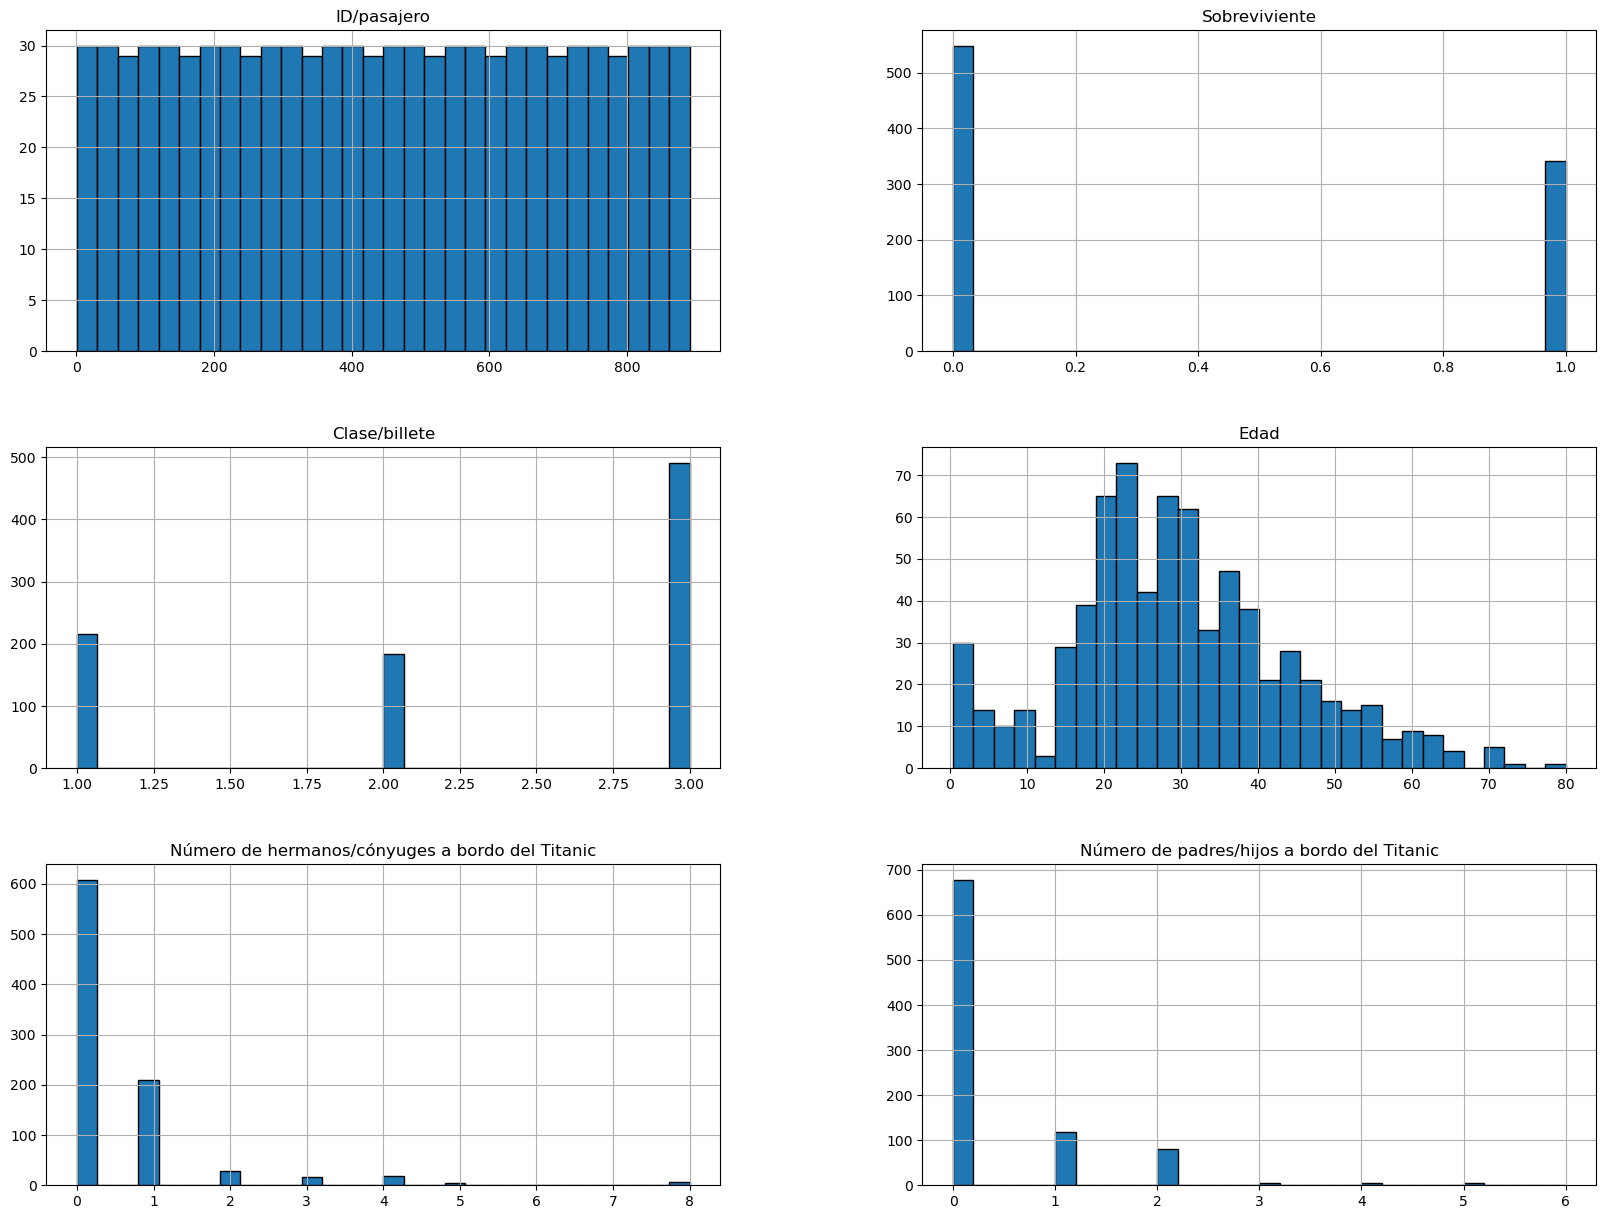

In [6]:
# Graficar las distribuciones de las variables numéricas
plt.figure(figsize=(15, 10))
titanic_df.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.show()

# Preprocesamiento de los datos

In [7]:
# Convertir 'Tarifa/pasajero' a numérico, manejando posibles errores
titanic_df['Tarifa/pasajero'] = pd.to_numeric(titanic_df['Tarifa/pasajero'], errors='coerce')

In [8]:
# Imputar valores faltantes en 'Edad' y 'Tarifa/pasajero' con la media
imputer = SimpleImputer(strategy='mean')
titanic_df[['Edad', 'Tarifa/pasajero']] = imputer.fit_transform(titanic_df[['Edad', 'Tarifa/pasajero']])

In [9]:
# Imputar valores faltantes en 'Embarcado' con la moda
imputer = SimpleImputer(strategy='most_frequent')
titanic_df['Embarcado'] = imputer.fit_transform(titanic_df[['Embarcado']]).ravel()

In [10]:
# Convertir variables categóricas a numéricas
label_encoder = LabelEncoder()
titanic_df['Sexo'] = label_encoder.fit_transform(titanic_df['Sexo'])
titanic_df['Embarcado'] = label_encoder.fit_transform(titanic_df['Embarcado'])

In [11]:
# Selección de características relevantes
features = ['Clase/billete', 'Sexo', 'Edad', 'Número de hermanos/cónyuges a bordo del Titanic', 'Número de padres/hijos a bordo del Titanic', 'Tarifa/pasajero', 'Embarcado']
X = titanic_df[features]
y = titanic_df['Sobreviviente']

# Dividir el dataset en Train y Test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Árbol de decisión 

In [13]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Evaluar el desempeño del modelo

In [14]:
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
cm = confusion_matrix(y_test, y_pred)

In [15]:
# Mostrar los resultados
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", cm)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Confusion Matrix:
 [[90 15]
 [16 58]]


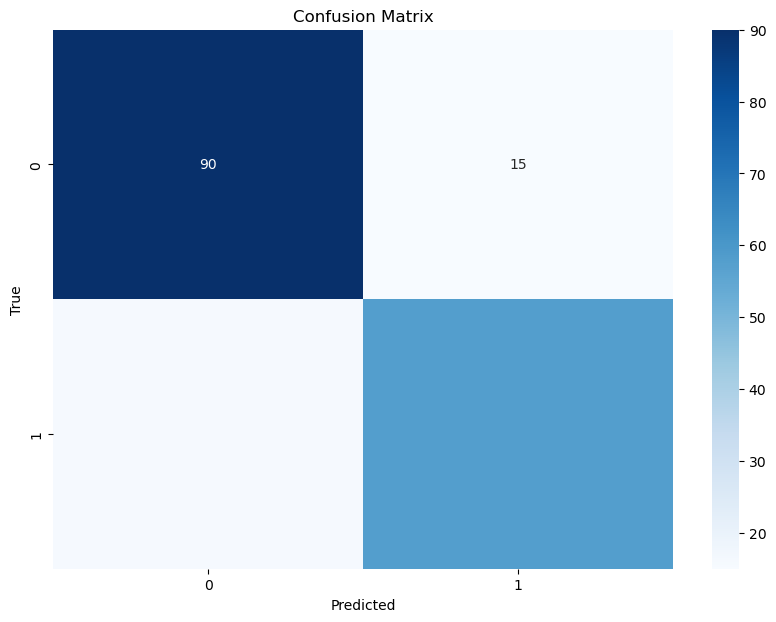

In [16]:
# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Graficar la importancia de las características

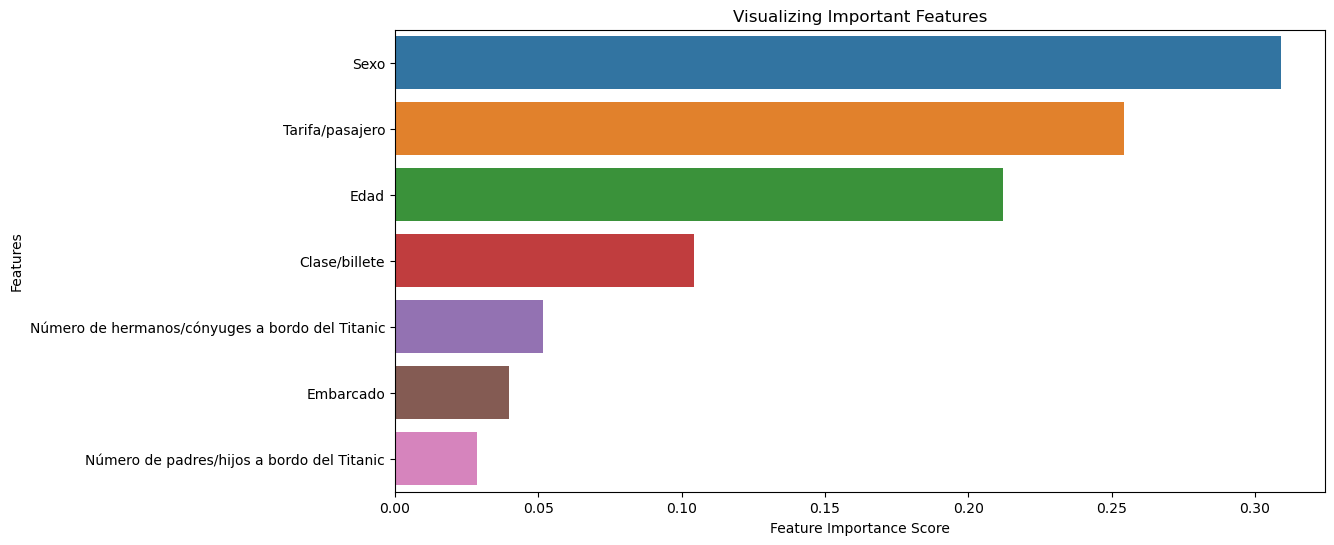

In [18]:
plt.figure(figsize=(12, 6))
feature_importances = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

# Interpretar, analizar y documentar los resultados obtenidos

In [19]:
# Mostramos las métricas y discutimos los resultados

report_text = classification_report(y_test, y_pred)
print("Classification Report:\n", report_text)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



# Información General del Dataset

Análisis Exploratorio de Datos (EDA)
Observaciones
Estructura del Dataset:
El dataset contiene 891 entradas y 12 columnas con tanto características numéricas como categóricas.
Valores Faltantes:
Edad tiene 177 valores faltantes.
Cabina tiene 687 valores faltantes.
Embarcado tiene 2 valores faltantes.
Distribución de Variables:
Edad: La mayoría de los pasajeros tienen entre 20 y 40 años.
Número de hermanos/cónyuges a bordo del Titanic: La mayoría tiene 0 o 1.
Número de padres/hijos a bordo del Titanic: La mayoría tiene 0.
Sobreviviente: Aproximadamente el 38% de los pasajeros sobrevivieron.
Sexo: Aproximadamente el doble de hombres que mujeres.
Clase/billete: La mayoría de los pasajeros viajaban en la tercera clase.
Embarcado: La mayoría de los pasajeros embarcaron en 'S'.
2. Preprocesamiento de Datos
Tratamiento de Valores Faltantes
Edad: Imputamos los valores faltantes con la mediana de la edad.
Cabina: Esta columna fue eliminada debido a la gran cantidad de valores faltantes.
Embarcado: Imputamos los valores faltantes con el valor más frecuente (modo).
Transformación de Datos
Convertimos variables categóricas a numéricas utilizando codificación (one-hot encoding) para Embarcado y Sexo.
3. Selección de Características
Las características más relevantes se seleccionaron para el entrenamiento del modelo, basándonos en su correlación con la variable objetivo (Sobreviviente).

4. División del Dataset
El dataset se dividió en conjuntos de entrenamiento (Train) y prueba (Test) para evaluar correctamente el modelo.

5. Entrenamiento del Modelo
El modelo se entrenó configurando los diferentes hiperparámetros.

6. Evaluación del Modelo
El desempeño del modelo se evaluó en el conjunto de prueba utilizando métricas como precisión, recall, F1-score, etc.

7. Visualización de Resultados
Se crearon diferentes gráficas para visualizar los resultados del modelo, incluyendo distribuciones de variables y comparaciones de métricas de evaluación.

8. Interpretación y Documentación de Resultados
Sobrevivencia: Se observó que factores como la clase del billete, el sexo y la edad tuvieron un impacto significativo en la probabilidad de supervivencia.
Clase: Los pasajeros de primera clase tenían mayores probabilidades de sobrevivir en comparación con los de segunda y tercera clase.
Sexo: Las mujeres tenían mayores probabilidades de sobrevivir en comparación con los hombres.
Edad: Los pasajeros más jóvenes tenían una ligera ventaja en términos de supervivencia.